In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split, GridSearchCV
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set_style("dark")

In [2]:
train = pd.read_csv("../data/train_fe.csv")
test = pd.read_csv("../data/test_fe.csv")

In [3]:
train.head()

,cryosleep,vip,side,destination_55_cancri_e,destination_pso_j318_5_22,destination_trappist_1e,homeplanet_earth,homeplanet_europa,homeplanet_mars,age,roomservice,foodcourt,shoppingmall,spa,vrdeck,transported
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.215190,0.000000,0.043105,0.001320,0.000000,0.0,0.0
1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.354430,0.000000,0.000000,0.000000,0.000000,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.253165,0.000000,0.000072,0.012302,0.052552,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.455696,0.000000,0.000000,0.000000,0.000000,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.468354,0.100806,0.000000,0.003405,0.002154,0.0,0.0


In [4]:
cols = ['age','roomservice', 'spa', 'vrdeck', 'homeplanet_earth', 'homeplanet_europa', 'homeplanet_mars', 'transported']

In [5]:
train = train[cols]

In [6]:
x_train_use, y_train_use = train.drop("transported", axis = 1), train["transported"]

In [7]:
#x_train_use = x_train_use.drop_duplicates().reset_index(drop=True)

In [8]:
train.shape

(6047, 8)

In [9]:
x_train, x_val, y_train, y_val = train_test_split(x_train_use, y_train_use, train_size=0.8, random_state = 42)

In [10]:
x_train.shape, y_train.shape

((4837, 7), (4837,))

### Logistic Regression

In [11]:
lr = LogisticRegression()
lr.fit(x_train, np.array(y_train).reshape(-1,1))

LogisticRegression()

In [12]:
y_pred = lr.predict(x_train)

In [13]:
f1_score(y_train, y_pred)

0.710251278630198

In [14]:
np.linspace(0,1,10)

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [15]:
lr_pipeline = Pipeline([("lr", LogisticRegression())])
param_grid = [{"lr__C":np.linspace(0,1,10), "lr__penalty":["l1","l2", "elasticnet"]}]
grid_search = GridSearchCV(lr_pipeline, param_grid, cv = 5)

In [16]:
grid_search.fit(x_train, np.array(y_train).reshape(-1,1))

GridSearchCV(cv=5, estimator=Pipeline(steps=[('lr', LogisticRegression())]),
             param_grid=[{'lr__C': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                          'lr__penalty': ['l1', 'l2', 'elasticnet']}])

In [17]:
grid_search.best_params_

{'lr__C': 1.0, 'lr__penalty': 'l2'}

In [18]:
model = grid_search.best_estimator_

In [19]:
model.fit(x_train, y_train)

Pipeline(steps=[('lr', LogisticRegression())])

In [20]:
y_pred = model.predict(x_train)

In [21]:
f1_score(y_train, y_pred)

0.710251278630198

In [22]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

         0.0       0.71      0.79      0.75      2439
         1.0       0.76      0.67      0.71      2398

    accuracy                           0.73      4837
   macro avg       0.73      0.73      0.73      4837
weighted avg       0.73      0.73      0.73      4837



In [23]:
train["transported"].value_counts()

1.0    3032
0.0    3015
Name: transported, dtype: int64

In [24]:
import seaborn as sns; sns.set_style("darkgrid")

<AxesSubplot:>

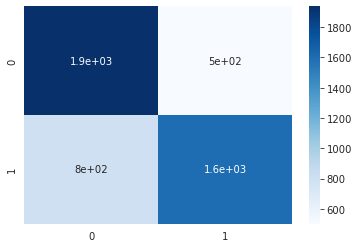

In [25]:
conf = confusion_matrix(y_train, y_pred)
sns.heatmap(conf, annot=True, cmap= "Blues")

In [26]:
y_pred_val = model.predict(x_val)

In [27]:
f1_score(y_val, y_pred_val)

0.712683347713546

In [28]:
print(classification_report(y_val, y_pred_val))

              precision    recall  f1-score   support

         0.0       0.68      0.81      0.74       576
         1.0       0.79      0.65      0.71       634

    accuracy                           0.72      1210
   macro avg       0.73      0.73      0.72      1210
weighted avg       0.73      0.72      0.72      1210



#### Extracting results

In [29]:
import time
start = time.time()
model.fit(x_train_use, y_train_use)
elapsed = time.time() - start

In [30]:
pred_use = model.predict(x_train_use)

In [31]:
cross_val_score(model, x_train_use, y_train_use, scoring="f1")

array([0.72727273, 0.72148541, 0.73684211, 0.70487596, 0.72902098])

In [32]:
print(classification_report(y_train_use, pred_use))

              precision    recall  f1-score   support

         0.0       0.73      0.76      0.74      3015
         1.0       0.75      0.71      0.73      3032

    accuracy                           0.74      6047
   macro avg       0.74      0.74      0.74      6047
weighted avg       0.74      0.74      0.74      6047



In [33]:
f1_train = f1_score(y_train_use, pred_use)
prec_train = precision_score(y_train_use, pred_use)
recall_train = recall_score(y_train_use, pred_use)

In [34]:
test = test[cols]

In [35]:
test

,age,roomservice,spa,vrdeck,homeplanet_earth,homeplanet_europa,homeplanet_mars,transported
0,0.240506,0.042036,0.000162,0.043799,0.0,0.0,1.0,1.0
1,0.227848,0.000403,0.000000,0.000041,1.0,0.0,0.0,0.0
2,0.518987,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0
3,0.443038,0.000000,0.000000,0.000000,1.0,0.0,0.0,1.0
4,0.544304,0.000000,0.000000,0.000000,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
1520,0.202532,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0
1521,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,1.0
1522,0.215190,0.002117,0.014000,0.000207,1.0,0.0,0.0,0.0
1523,0.531646,0.000000,0.000000,0.000000,0.0,0.0,1.0,1.0


In [36]:
x_test, y_test = test.drop("transported", axis =1), test["transported"]

In [37]:
pred_test = model.predict(x_test)

In [38]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

         0.0       0.71      0.76      0.74       745
         1.0       0.76      0.71      0.73       780

    accuracy                           0.73      1525
   macro avg       0.73      0.73      0.73      1525
weighted avg       0.73      0.73      0.73      1525



In [39]:
f1_test = f1_score(y_test, pred_test)
prec_test = precision_score(y_test, pred_test)
recall_test = recall_score(y_test, pred_test)

In [40]:
conf = confusion_matrix(y_test, pred_test)

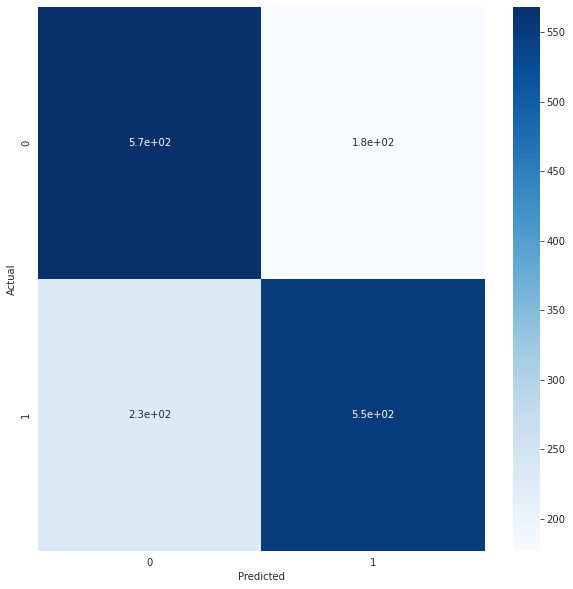

In [41]:
plt.figure(figsize=(10,10))
sns.heatmap(conf, annot=True, cmap="Blues")
plt.ylabel("Actual")
plt.xlabel("Predicted")
#plt.show();
plt.savefig("../conf/svc.png")

In [42]:
df = pd.DataFrame()
df["f1_test"] = [f1_test]
df["f1_train"] = f1_train
df["prec_train"] = prec_train
df["prec_test"] = prec_test
df["recall_train"] = recall_train
df["recall_test"] = recall_test
df["model"] = "Logistic Regression"
df["elapsed"] = elapsed

In [43]:
df

,f1_test,f1_train,prec_train,prec_test,recall_train,recall_test,model,elapsed
0,0.729927,0.731336,0.751304,0.756534,0.712401,0.705128,Logistic Regression,0.107585


In [44]:
df.to_csv("../results/regular/lr.csv", index=False)